### About Dataset
**Problem Statement**

You are working as a data scientist in a global finance company. Over the years, the company has collected basic bank details and gathered a lot of credit-related information. The management wants to build an intelligent system to segregate the people into credit score brackets to reduce the manual efforts.

**Task**
Given a person’s credit-related information, build a machine learning model that can classify the credit score.

### Dataset description

**ID:** Represents a unique identification of an entry

**Customer_ID:** Represents a unique identification of a person

**Name:** Represents the name of a person

**Month:** Represents the month of the year

**Age:** Represents the age of the person

**SSN:** Represents the social security number of a person

**Occupation:** Represents the occupation of the person

**Annual_Income:** Represents the annual income of the person

**Monthly_Base_Salary:** Represents the monthly base salary of a person

**Num_Bank_Accounts:** Represents the number of bank accounts a person holds

**Num_Credit_Card:** Represents the number of other credit cards held by a person

**Interest_Rate:** Represents the interest rate on credit card

**Num_of_Loan:** Represents the number of loans taken from the bank

**Type_of_Loan:** Represents the types of loan taken by a person

**Delay_from_due_date:** Represents the average number of days delayed from the payment date

**Num_of_delayed_Payment:** Represents the average number of payments delayed by a person

**Changed_Credit_Limit:** Represents the percentage change in credit card limit

**Num_Credit_Inquiries:** Represents the number of credit card inquiries

**Credit_Mix:** Represents the classification of the mix of credits

**Outstanding_Debt:** Represents the remaining debt to be paid (in USD)

**Credit_Utilization_Ratio:** Represents the utilization ratio of credit card

**Credit_History_Age:** Represents the age of credit history of the person

**Payment_of_Min_Amount:** Represents whether only the minimum amount was paid by the person

**Total_EMI_per_month:** Represents the monthly EMI payments (in USD)

**Amount_invested_monthly:** Represents the monthly amount invested by the customer (in USD)

**Payment_Behaviour:** Represents the payment behavior of the customer (in USD)

**Monthly_Balance:** Represents the monthly balance amount of the customer (in USD)

**Credit_Score:** Represents the bracket of credit score (Poor, Standard, Good)

### Import libraries

In [1]:
# IMPORT GENERIC PACKAGES
import numpy as np # numerical calc package
import pandas as pd # holds data
import zipfile
import matplotlib.pyplot as plt # plotting library
import seaborn as sns # pretty plotting
#sns.set(rc={'figure.figsize':(20,10)})

### Load dataset

We start by loading and inspecting the dataset to get a high-level understanding of its structure and content.

In [2]:
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [3]:
! kaggle datasets download parisrohan/credit-score-classification --force

Dataset URL: https://www.kaggle.com/datasets/parisrohan/credit-score-classification
License(s): CC0-1.0
  0% 0.00/9.51M [00:00<?, ?B/s]
100% 9.51M/9.51M [00:00<00:00, 227MB/s]


In [4]:
# Extract the zip file
with zipfile.ZipFile('credit-score-classification.zip', 'r') as zip_ref:
    zip_ref.extractall()

# Load the train.csv file
data = pd.read_csv('train.csv')

<ipython-input-4-7adf1a19118c>:6: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('train.csv')


In [5]:
data.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [6]:
# checking the data types for each of the column in the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [7]:
# checking number of rows and columns
data.shape

(100000, 28)

In [8]:
# checking column names
data.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [9]:
# statistical summary of the dataset
data.describe()

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
count,84998.000000,100000.000000,100000.00000,100000.000000,100000.000000,98035.000000,100000.000000,100000.000000
mean,4194.170850,17.091280,22.47443,72.466040,21.068780,27.754251,32.285173,1403.118217
std,3183.686167,117.404834,129.05741,466.422621,14.860104,193.177339,5.116875,8306.041270
min,303.645417,-1.000000,0.00000,1.000000,-5.000000,0.000000,20.000000,0.000000
25%,1625.568229,3.000000,4.00000,8.000000,10.000000,3.000000,28.052567,30.306660
50%,3093.745000,6.000000,5.00000,13.000000,18.000000,6.000000,32.305784,69.249473
75%,5957.448333,7.000000,7.00000,20.000000,28.000000,9.000000,36.496663,161.224249
max,15204.633333,1798.000000,1499.00000,5797.000000,67.000000,2597.000000,50.000000,82331.000000


# Data Preprocessing and Cleaning

Data preprocessing is crucial for preparing the dataset for modeling. This step involves **but not limited to** the following:

1. Remove irrelevant column/s
2. Remove duplicate row/s
2. Handle missing values
3.   Deal with outliers
4.   Convert categorical variables into numerical format

Data cleaning ensures that the dataset is ready for analysis and modeling.

### Remove irrelevant column/s

Variables that do not obviously have value in the analysis should be removed.

In [10]:
data.drop(columns = ['ID', 'Customer_ID', 'Name', 'SSN', 'Num_Credit_Inquiries'], inplace=True)

### Remove duplicate row/s

Identify and remove any duplicate rows from the dataset. Duplicate rows can skew analysis results and lead to incorrect insights. After removing duplicates, further analysis and insights can be derived from the cleaned dataset.

In [11]:
data = data.drop_duplicates(subset=['Month', 'Age', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit','Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'])

### Check and convert to right data type

In order to prepare the dataset for analysis, the correct data types should be observed.

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 23 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Month                     100000 non-null  object 
 1   Age                       100000 non-null  object 
 2   Occupation                100000 non-null  object 
 3   Annual_Income             100000 non-null  object 
 4   Monthly_Inhand_Salary     84998 non-null   float64
 5   Num_Bank_Accounts         100000 non-null  int64  
 6   Num_Credit_Card           100000 non-null  int64  
 7   Interest_Rate             100000 non-null  int64  
 8   Num_of_Loan               100000 non-null  object 
 9   Type_of_Loan              88592 non-null   object 
 10  Delay_from_due_date       100000 non-null  int64  
 11  Num_of_Delayed_Payment    92998 non-null   object 
 12  Changed_Credit_Limit      100000 non-null  object 
 13  Credit_Mix                100000 non-null  ob

In [13]:
# Replace '-' and '_' in selected columns
columns_to_clean = ['Age', 'Annual_Income', 'Num_of_Loan', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Num_of_Delayed_Payment', 'Outstanding_Debt', 'Amount_invested_monthly', 'Monthly_Balance', 'Delay_from_due_date']
data[columns_to_clean] = data[columns_to_clean].replace({'-': '', '_': ''}, regex=True)

In [14]:
# Replace blank to null values
data.replace(['', '-', '_______', '_', 'nan', '!@9#%8', 'NA', 'NaN'], np.nan, inplace=True)

In [15]:
# Replace "No Minimum" or "NM" in Payment_of_Min_Amount column to  "Yes"
data['Payment_of_Min_Amount'] = data['Payment_of_Min_Amount'].replace('NM', 'Yes')

In [16]:
# Month
# Dictionary to map month names to integers
month_to_int = {
    'January': 1,
    'February': 2,
    'March': 3,
    'April': 4,
    'May': 5,
    'June': 6,
    'July': 7,
    'August': 8,
    'September': 9,
    'October': 10,
    'November': 11,
    'December': 12
}

# Convert 'Month' column to integers
data['Month'] = data['Month'].map(month_to_int)

In [17]:
# Convert the 'Years and Months' string into months
def text_to_months(text):
    if pd.isna(text):
        return 0
    # Split the text into individual words
    words = text.split()

    # Extract the years and months
    years = int(words[0])
    months = int(words[3]) if len(words) > 3 else 0

    # Calculate the total number of months
    total_months = years * 12 + months

    return total_months

data['Credit_History_Age'] = data['Credit_History_Age'].apply(text_to_months)

In [18]:
# Convert to right data types
data['Age'] = data['Age'].astype('int') # to int
data['Annual_Income'] = data['Annual_Income'].astype('float') # to float
data['Monthly_Inhand_Salary'] = data['Monthly_Inhand_Salary'].astype('float') # to float
data['Num_of_Loan'] = data['Num_of_Loan'].astype('int') # to int
data['Num_of_Delayed_Payment'] = data['Num_of_Delayed_Payment'].astype('float') # to float
data['Changed_Credit_Limit'] = data['Changed_Credit_Limit'].astype('float') # to float
data['Outstanding_Debt'] = data['Outstanding_Debt'].astype('float') # to float
data['Amount_invested_monthly'] = data['Amount_invested_monthly'].astype('float') # to float
data['Monthly_Balance'] = data['Monthly_Balance'].astype('float') # to float

In [19]:
data

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,1,23,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,NaN,809.98,26.822620,265,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good
1,2,23,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,31.944960,0,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,Good
2,3,500,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,28.609352,267,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,Good
3,4,23,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,31.377862,268,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good
4,5,23,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,24.797347,269,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,4,25,Mechanic,39628.99,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",...,NaN,502.38,34.663572,378,No,35.104023,60.971333,High_spent_Large_value_payments,479.866228,Poor
99996,5,25,Mechanic,39628.99,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",...,NaN,502.38,40.565631,379,No,35.104023,54.185950,High_spent_Medium_value_payments,496.651610,Poor
99997,6,25,Mechanic,39628.99,3359.415833,4,6,5729,2,"Auto Loan, and Student Loan",...,Good,502.38,41.255522,380,No,35.104023,24.028477,High_spent_Large_value_payments,516.809083,Poor
99998,7,25,Mechanic,39628.99,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",...,Good,502.38,33.638208,381,No,35.104023,251.672582,Low_spent_Large_value_payments,319.164979,Standard


## Handle missing values

Having missing values in the data is inevitable.

1. Dropping of columns
2. Imputation of values

In [20]:
# To check the number of missing values
data.isnull().sum().sort_values(ascending=False)

Credit_Mix                  20195
Monthly_Inhand_Salary       15002
Type_of_Loan                11408
Payment_Behaviour            7600
Occupation                   7062
Num_of_Delayed_Payment       7002
Amount_invested_monthly      4479
Changed_Credit_Limit         2091
Monthly_Balance              1200
Num_Credit_Card                 0
Age                             0
Month                           0
Num_Bank_Accounts               0
Annual_Income                   0
Delay_from_due_date             0
Outstanding_Debt                0
Interest_Rate                   0
Num_of_Loan                     0
Credit_Utilization_Ratio        0
Total_EMI_per_month             0
Payment_of_Min_Amount           0
Credit_History_Age              0
Credit_Score                    0
dtype: int64

### Drop columns

Ask this:
Drop or impute?


In [21]:
# 1. Forward fill method - This is useful for filling missing values in a time series or sequential data where you want to carry forward the last known value.
def cleaning_Null_columns(data,method,headlines):
  data.fillna(method = method, inplace = True)
  return data.value_counts(dropna = False)

cleaning_Null_columns(data['Credit_Mix'],'bfill',0)
data["Type_of_Loan"] = data["Type_of_Loan"].fillna(data["Type_of_Loan"].ffill())
data["Payment_Behaviour"] = data["Payment_Behaviour"].fillna(data["Payment_Behaviour"].ffill())
data["Occupation"] = data["Occupation"].fillna(data["Occupation"].ffill())


In [22]:
# 2. Converting null values to zeros
data['Credit_History_Age'] = data['Credit_History_Age'].fillna('0')
data['Num_of_Delayed_Payment'] = data['Num_of_Delayed_Payment'].fillna('0')
data['Amount_invested_monthly'] = data['Amount_invested_monthly'].fillna('0')
data['Changed_Credit_Limit'] = data['Changed_Credit_Limit'].fillna('0')

In [23]:
# 3. Using median value to fill in missing values
data['Monthly_Inhand_Salary'] = data['Monthly_Inhand_Salary'].fillna(data['Monthly_Inhand_Salary'].median())
data['Monthly_Balance'] = data['Monthly_Balance'].fillna(data['Monthly_Balance'].median())

In [24]:
# Rechecking data for null values after cleaning
data.isnull().sum().sort_values(ascending=False)

Month                       0
Age                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

# Perform Exploratory Data Analysis (EDA)

EDA is an essential part of any data analysis project. It involves **visualizing and understanding the dataset's characteristics**, **exploring relationships between variables**, and **identifying patterns or trends**. EDA provides valuable insights that guide **feature engineering and model selection**.

In [25]:
cleaned_data = data.copy()

In [26]:
cleaned_data.head()

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,1,23,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,26.822620,265,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good
1,2,23,Scientist,19114.12,3093.745000,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,31.944960,0,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,Good
2,3,500,Scientist,19114.12,3093.745000,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,28.609352,267,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,Good
3,4,23,Scientist,19114.12,3093.745000,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,31.377862,268,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good
4,5,23,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,24.797347,269,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good


In [27]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 23 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Month                     100000 non-null  int64  
 1   Age                       100000 non-null  int64  
 2   Occupation                100000 non-null  object 
 3   Annual_Income             100000 non-null  float64
 4   Monthly_Inhand_Salary     100000 non-null  float64
 5   Num_Bank_Accounts         100000 non-null  int64  
 6   Num_Credit_Card           100000 non-null  int64  
 7   Interest_Rate             100000 non-null  int64  
 8   Num_of_Loan               100000 non-null  int64  
 9   Type_of_Loan              100000 non-null  object 
 10  Delay_from_due_date       100000 non-null  int64  
 11  Num_of_Delayed_Payment    100000 non-null  object 
 12  Changed_Credit_Limit      100000 non-null  object 
 13  Credit_Mix                100000 non-null  ob

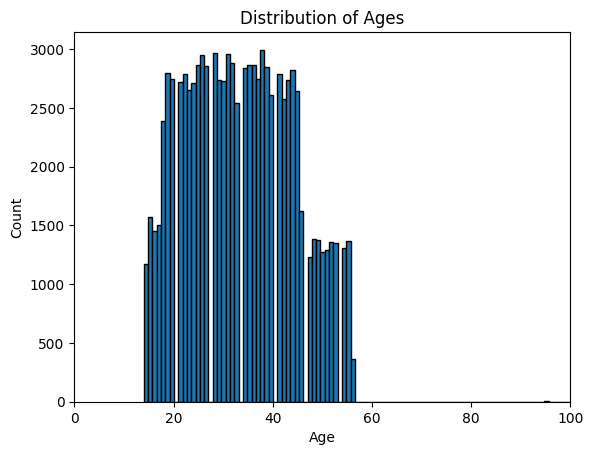

In [28]:
cleaned_data['Age'].plot(kind='hist', bins=10000, edgecolor='black')  # Adjust the number of bins as needed

# Adding labels and title
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Ages')

# Set x-axis limits
plt.xlim(xmin=0, xmax=100)  # Adjust the limits as needed

# Display the plot
plt.show()

Text(0, 0.5, 'Count')

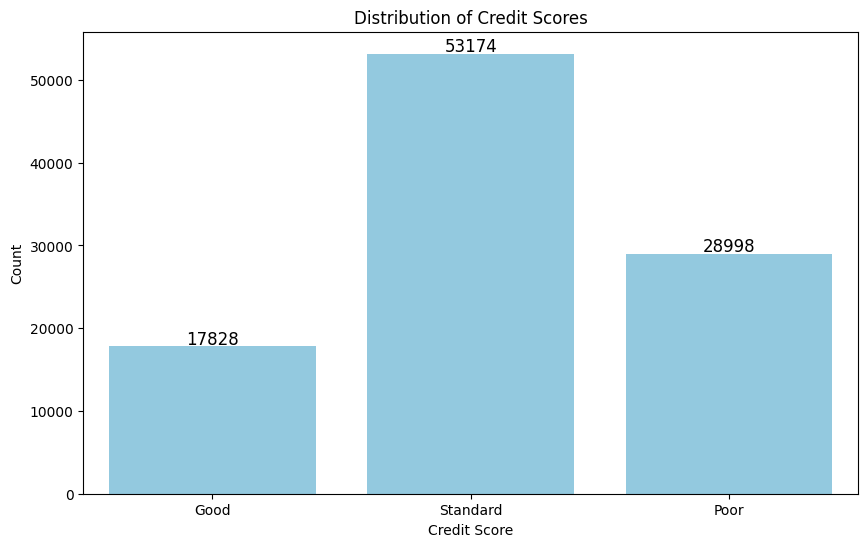

In [29]:
plt.figure(figsize=(10, 6))

# Create the count plot with a specific color
color = 'skyblue'
ax = sns.countplot(x=cleaned_data['Credit_Score'], color=color)

# Add count labels on top of the bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

# Set plot title and labels
ax.set_title('Distribution of Credit Scores')
ax.set_xlabel('Credit Score')
ax.set_ylabel('Count')

<ipython-input-30-7f6f094490a4>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=cleaned_data['Occupation'], palette='Set2')


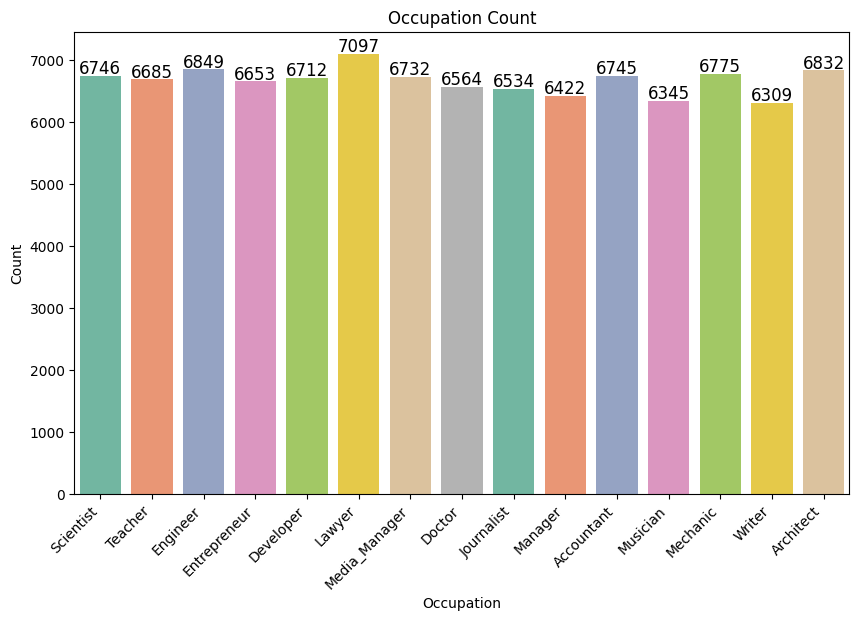

In [30]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x=cleaned_data['Occupation'], palette='Set2')

# Add count labels on top of the bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

# Set plot title and labels
ax.set_title('Occupation Count')
ax.set_xlabel('Occupation')
ax.set_ylabel('Count')

# Rotate x-axis labels for better readability if there are many occupations
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()

<ipython-input-31-875da452599d>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cleaned_data['Monthly_Inhand_Salary'], label = 'Skewness: %.2f'%(cleaned_data['Monthly_Inhand_Salary'].skew()))


Text(0.5, 1.0, 'Customer Monthly Salary Distribution')

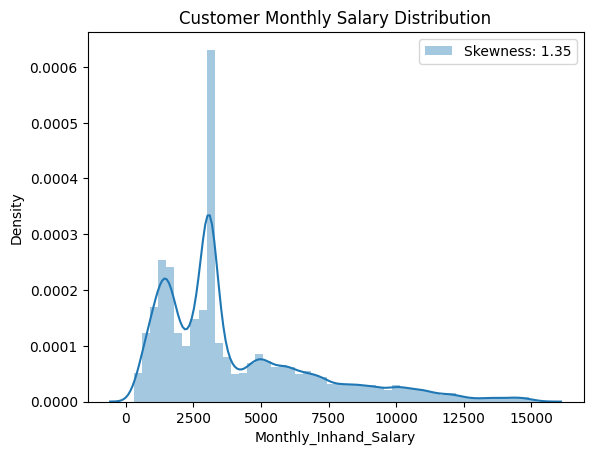

In [31]:
sns.distplot(cleaned_data['Monthly_Inhand_Salary'], label = 'Skewness: %.2f'%(cleaned_data['Monthly_Inhand_Salary'].skew()))
plt.legend(loc = 'best')
plt.title('Customer Monthly Salary Distribution')

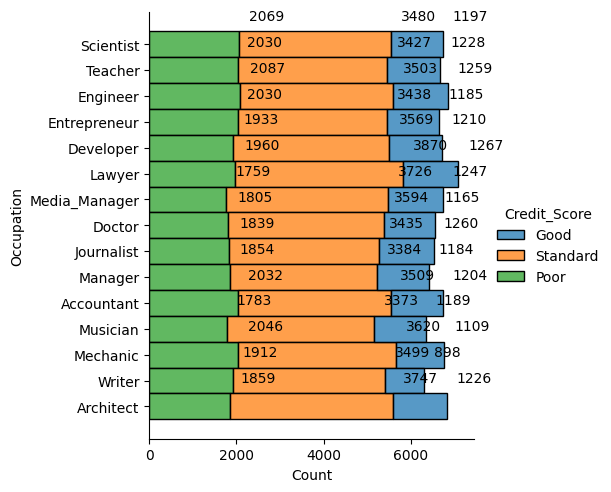

In [32]:
g = sns.displot(data=cleaned_data, y="Occupation", hue="Credit_Score", multiple="stack")

# Access the matplotlib Axes object from the seaborn FacetGrid
ax = g.ax

# Add counts as labels to each bar
for p in ax.patches:
    ax.annotate(f'{p.get_width():.0f}', ((p.get_x() + p.get_width()), p.get_y()), xytext=(7, 8), textcoords='offset points')

# Display the plot
plt.show()

Text(0, 0.5, 'Count')

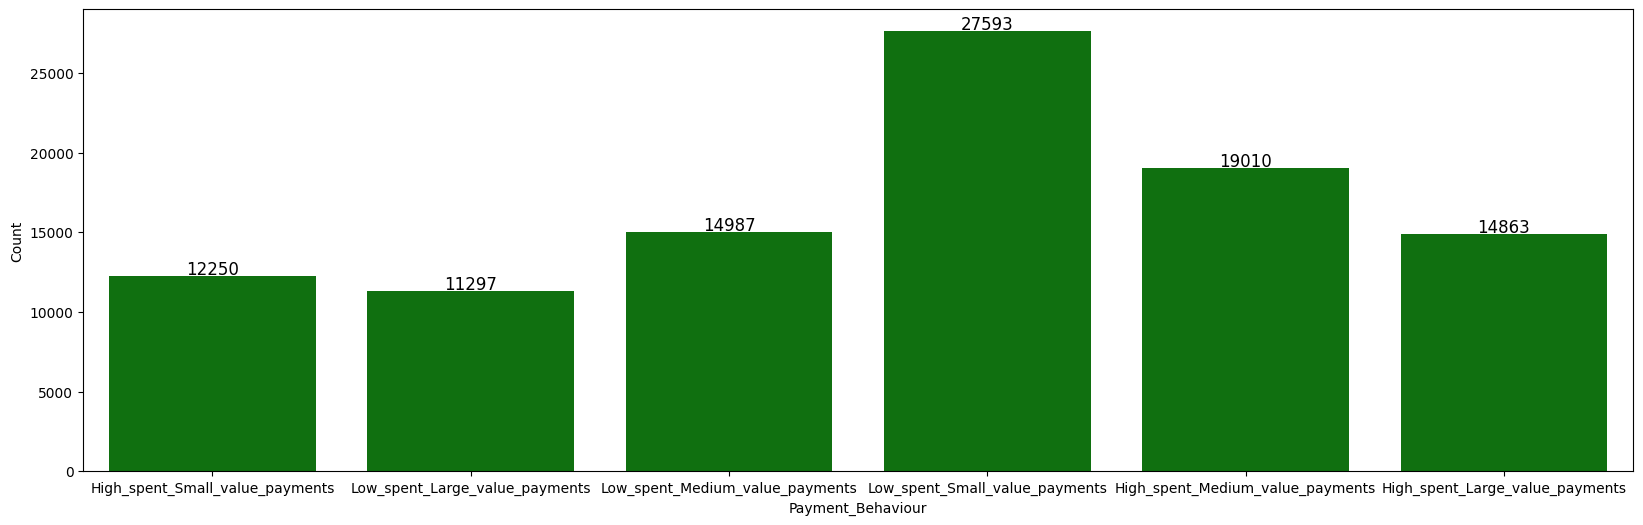

In [33]:
plt.figure(figsize=(20, 6))

# Create the count plot with a specific color
color = 'green'
ax = sns.countplot(x=cleaned_data['Payment_Behaviour'], color=color)

# Add count labels on top of the bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

# Set plot title and labels
ax.set_xlabel('Payment_Behaviour')
ax.set_ylabel('Count')

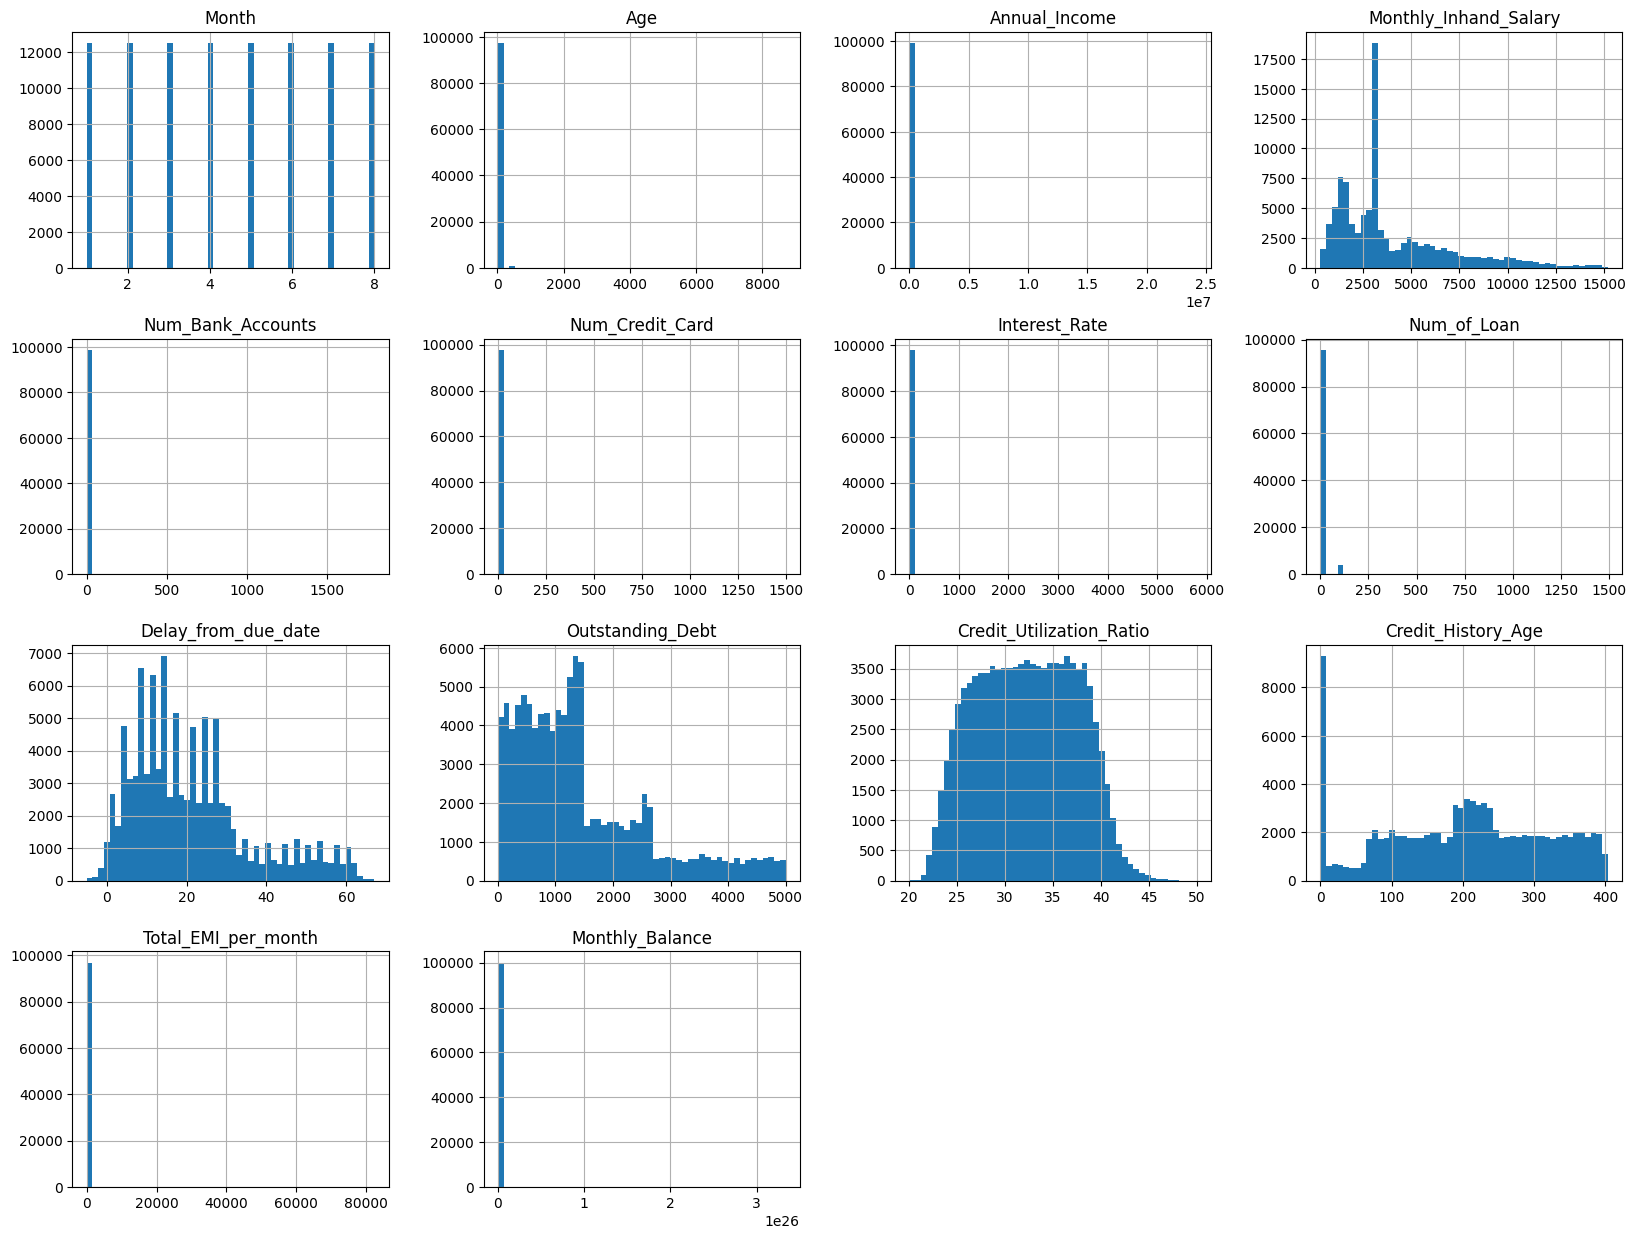

In [34]:
cleaned_data.hist(bins=50, figsize=(20,15))
plt.show()

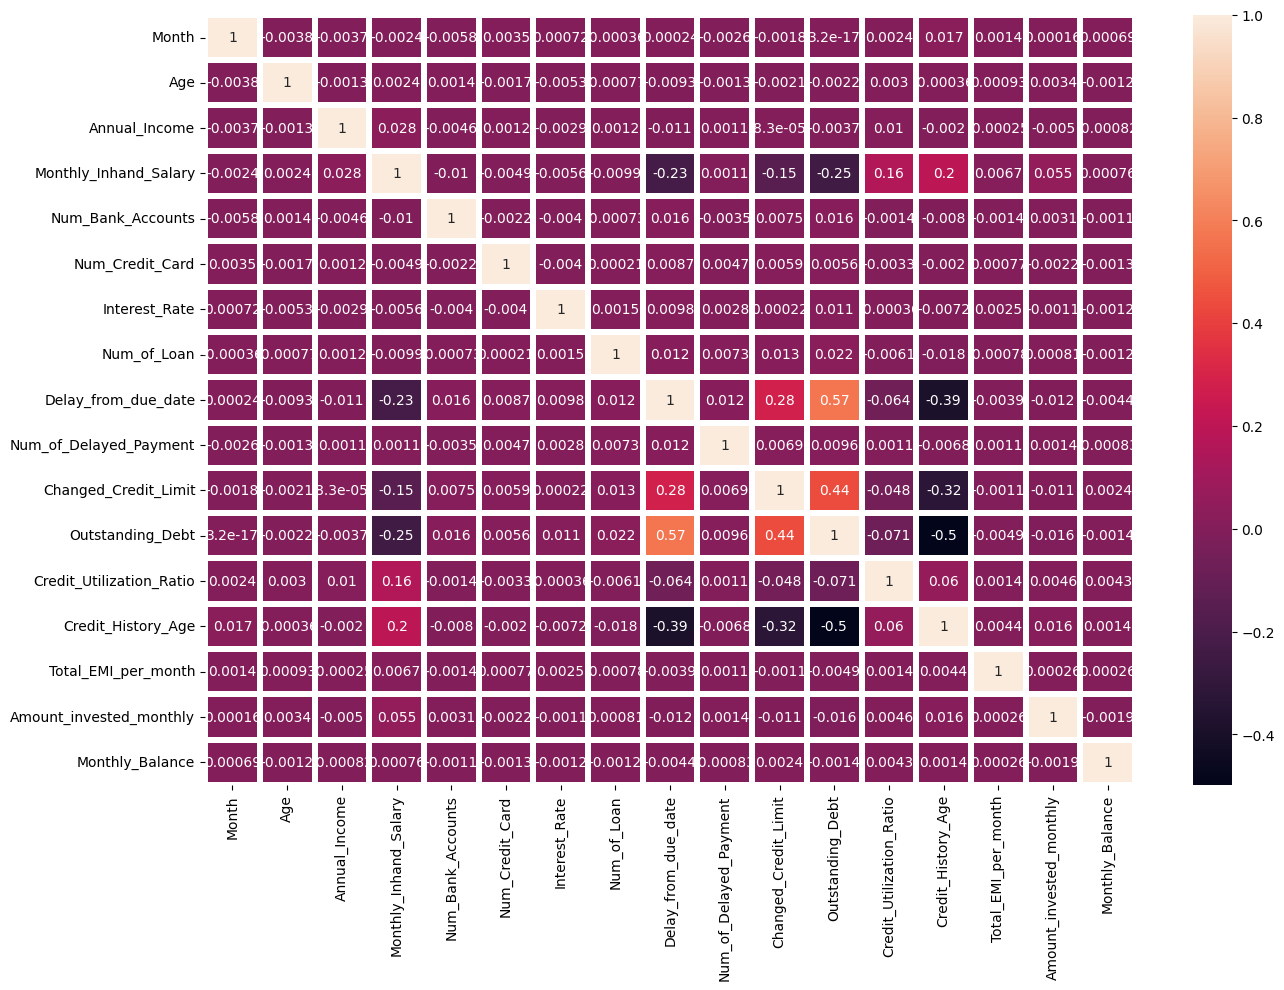

In [35]:
# Drop the 'Occupation' column
data_train = cleaned_data.drop(columns=['Occupation', 'Type_of_Loan', 'Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour', 'Credit_Score'])

# Plot the heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(data_train.corr(), cbar=True, cmap='rocket', annot=True, linewidths=4, linecolor='white')
plt.show()

In [36]:
import plotly.express as px
fig = px.sunburst(cleaned_data, path=['Credit_Score', 'Occupation'], values='Annual_Income')
fig.show()

In [37]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 23 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Month                     100000 non-null  int64  
 1   Age                       100000 non-null  int64  
 2   Occupation                100000 non-null  object 
 3   Annual_Income             100000 non-null  float64
 4   Monthly_Inhand_Salary     100000 non-null  float64
 5   Num_Bank_Accounts         100000 non-null  int64  
 6   Num_Credit_Card           100000 non-null  int64  
 7   Interest_Rate             100000 non-null  int64  
 8   Num_of_Loan               100000 non-null  int64  
 9   Type_of_Loan              100000 non-null  object 
 10  Delay_from_due_date       100000 non-null  int64  
 11  Num_of_Delayed_Payment    100000 non-null  object 
 12  Changed_Credit_Limit      100000 non-null  object 
 13  Credit_Mix                100000 non-null  ob

## Deal with outliers

Outliers are extreme values that significantly differ from other data points. This question requires detecting outliers using visual techniques such as boxplot, scatter plot, and histogram. These visualizations help identify values that fall outside the expected range.

1. Generate box plots, histograms
2. Remove outlier using IQR method

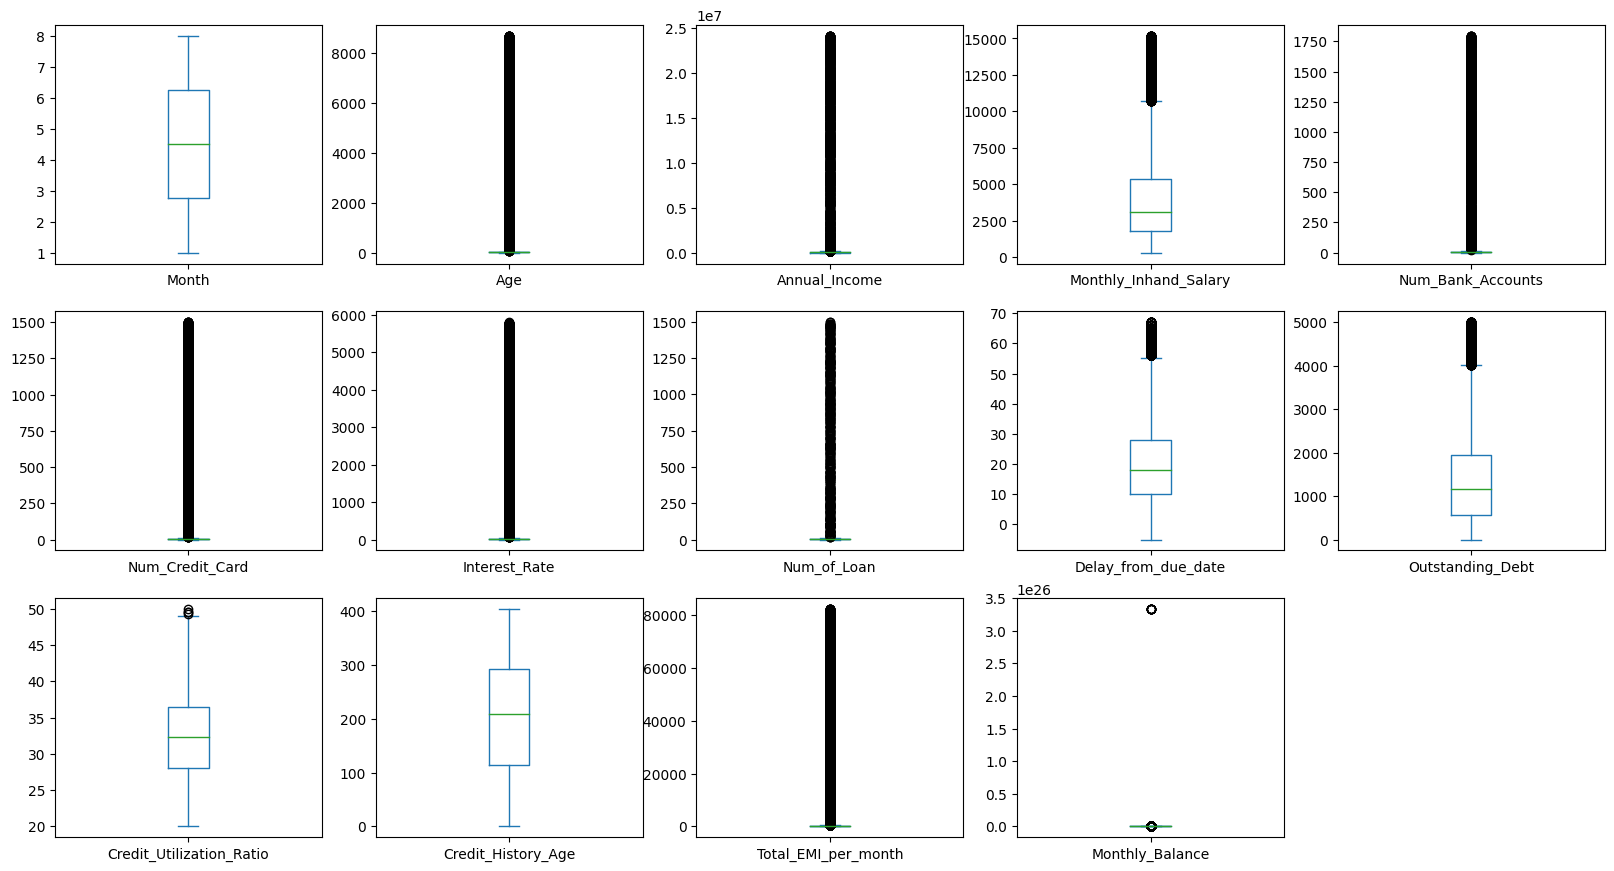

In [38]:
# Generate box plots
cleaned_data.plot(kind = "box" , subplots = True , figsize = (20,18) ,  layout = (5,5))
plt.show()

In [39]:
# Remove outlier using IQR method
# List of columns to process
columns_to_check = ['Age', 'Annual_Income', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate',
                    'Num_of_Loan', 'Delay_from_due_date', 'Outstanding_Debt',
                    'Credit_Utilization_Ratio', 'Total_EMI_per_month', 'Monthly_Balance']

# Function to remove outliers using IQR
def remove_outliers(cleaned_data, columns):
    for column in columns:
        Q1 = cleaned_data[column].quantile(0.25)
        Q3 = cleaned_data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_limit = Q1 - 1.5 * IQR
        upper_limit = Q3 + 1.5 * IQR
        cleaned_data = cleaned_data[(cleaned_data[column] >= lower_limit) & (cleaned_data[column] <= upper_limit)]
    return cleaned_data

# Removing outliers
cleaned_data = remove_outliers(cleaned_data, columns_to_check)

cleaned_data

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,1,23,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,26.822620,265,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good
1,2,23,Scientist,19114.12,3093.745000,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,31.944960,0,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,Good
3,4,23,Scientist,19114.12,3093.745000,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,31.377862,268,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good
4,5,23,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,24.797347,269,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good
5,6,23,Scientist,19114.12,3093.745000,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,27.262259,270,No,49.574949,62.430172,High_spent_Medium_value_payments,340.479212,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,3,25,Mechanic,39628.99,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",...,Good,502.38,39.323569,377,No,35.104023,140.581403,High_spent_Medium_value_payments,410.256158,Poor
99995,4,25,Mechanic,39628.99,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",...,Good,502.38,34.663572,378,No,35.104023,60.971333,High_spent_Large_value_payments,479.866228,Poor
99996,5,25,Mechanic,39628.99,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",...,Good,502.38,40.565631,379,No,35.104023,54.18595,High_spent_Medium_value_payments,496.651610,Poor
99998,7,25,Mechanic,39628.99,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",...,Good,502.38,33.638208,381,No,35.104023,251.672582,Low_spent_Large_value_payments,319.164979,Standard


In [40]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 66264 entries, 0 to 99999
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Month                     66264 non-null  int64  
 1   Age                       66264 non-null  int64  
 2   Occupation                66264 non-null  object 
 3   Annual_Income             66264 non-null  float64
 4   Monthly_Inhand_Salary     66264 non-null  float64
 5   Num_Bank_Accounts         66264 non-null  int64  
 6   Num_Credit_Card           66264 non-null  int64  
 7   Interest_Rate             66264 non-null  int64  
 8   Num_of_Loan               66264 non-null  int64  
 9   Type_of_Loan              66264 non-null  object 
 10  Delay_from_due_date       66264 non-null  int64  
 11  Num_of_Delayed_Payment    66264 non-null  object 
 12  Changed_Credit_Limit      66264 non-null  object 
 13  Credit_Mix                66264 non-null  object 
 14  Outstanding

## Feature Engineering - Convert Categorical Features to Numerical Format

In [41]:
data_new = cleaned_data.copy()

In [42]:
# Check number of unique entries per column
for cat in data_new.columns:

  print(cat, data_new[cat].nunique())

Month 8
Age 43
Occupation 15
Annual_Income 10796
Monthly_Inhand_Salary 11078
Num_Bank_Accounts 13
Num_Credit_Card 12
Interest_Rate 34
Num_of_Loan 10
Type_of_Loan 5053
Delay_from_due_date 61
Num_of_Delayed_Payment 485
Changed_Credit_Limit 3909
Credit_Mix 3
Outstanding_Debt 10549
Credit_Utilization_Ratio 66264
Credit_History_Age 405
Payment_of_Min_Amount 2
Total_EMI_per_month 9805
Amount_invested_monthly 60402
Payment_Behaviour 6
Monthly_Balance 65703
Credit_Score 3


### Create dummies

We'll need to convert categorical features to dummy variables using pandas. Otherwise our machine learning algorithm won't be able to directly take in those features as inputs.

Categorical variables are:

*   Occupation
*   Type_of_Loan
*   Credit_Mix
*   Payment_of_Min_Amount
*   Payment_Behaviour
*   Credit_Score








In [43]:
dummy_occupation = pd.get_dummies(data_new['Occupation'], drop_first=True).astype(int)
dummy_credit_mix = pd.get_dummies(data_new['Credit_Mix'], drop_first=True).astype(int)
dummy_min_amount = pd.get_dummies(data_new['Payment_of_Min_Amount'], drop_first=True).astype(int)
dummy_payment_behaviour = pd.get_dummies(data_new['Payment_Behaviour'], drop_first=True).astype(int)

In [44]:
# Rename columns
dummy_credit_mix = dummy_credit_mix.rename(columns={
    'Good': 'Good_Credit_Mix',
    'Standard': 'Standard_Credit_Mix',
    'Bad': 'Bad_Credit_Mix'
})

In [45]:
# Rename columns
dummy_min_amount = dummy_min_amount.rename(columns={
    'Yes': 'Yes_Payment_of_Min_Amount',
    'No': 'No_Payment_of_Min_Amount'
})

In [46]:
data_new.corr(numeric_only=True)

,Month,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Monthly_Balance
Month,1.000000,0.016473,-0.006576,-0.005087,-0.000042,0.000276,-0.000719,-0.002526,-0.000112,-0.001413,0.002996,0.019311,0.012786,-0.003389
Age,0.016473,1.000000,0.072588,0.063599,-0.176151,-0.133972,-0.205219,-0.192387,-0.162308,-0.195674,0.012495,0.173853,-0.071769,0.091871
Annual_Income,-0.006576,0.072588,1.000000,0.918886,-0.193530,-0.155134,-0.220096,-0.185063,-0.172174,-0.215824,0.080129,0.160745,0.546402,0.534930
Monthly_Inhand_Salary,-0.005087,0.063599,0.918886,1.000000,-0.176662,-0.140891,-0.202108,-0.168931,-0.157917,-0.198447,0.073857,0.149312,0.500061,0.494308
Num_Bank_Accounts,-0.000042,-0.176151,-0.193530,-0.176662,1.000000,0.398041,0.540944,0.406234,0.527160,0.452527,-0.032857,-0.322752,0.108616,-0.200311
Num_Credit_Card,0.000276,-0.133972,-0.155134,-0.140891,0.398041,1.000000,0.458884,0.355341,0.437630,0.442676,-0.022345,-0.274595,0.105250,-0.167747
Interest_Rate,-0.000719,-0.205219,-0.220096,-0.202108,0.540944,0.458884,1.000000,0.495414,0.537029,0.608571,-0.034590,-0.404798,0.140226,-0.238052
Num_of_Loan,-0.002526,-0.192387,-0.185063,-0.168931,0.406234,0.355341,0.495414,1.000000,0.422850,0.553420,-0.048109,-0.417073,0.501674,-0.371427
Delay_from_due_date,-0.000112,-0.162308,-0.172174,-0.157917,0.527160,0.437630,0.537029,0.422850,1.000000,0.505551,-0.033209,-0.324176,0.130922,-0.196744
Outstanding_Debt,-0.001413,-0.195674,-0.215824,-0.198447,0.452527,0.442676,0.608571,0.553420,0.505551,1.000000,-0.037129,-0.437253,0.160495,-0.257603


In [47]:
loan_type_dummy = cleaned_data.copy()

In [48]:
# Get the unique types of loans to be able to v=crate the new columns
loan_type_dummy = loan_type_dummy["Type_of_Loan"].str.replace('and',' ').str.split(',').explode().str.strip().unique()
loan_type_dummy

array(['Auto Loan', 'Credit-Builder Loan', 'Personal Loan',
       'Home Equity Loan', 'Not Specified', 'Mortgage Loan',
       'Student Loan', 'Debt Consolidation Loan', 'Payday Loan'],
      dtype=object)

In [49]:
def count_loan_types(row):
    if pd.notna(row):  # Check if the row is not NaN (missing value)
        # Split the row's loan types into a list
        loan_type_list = row.split(', ')

        # Initialize a dictionary to store the counts for each loan type
        counts = {loan_type: 0 for loan_type in loan_type_dummy}

        # Count the number of occurrences of each loan type in the row
        for loan_type in loan_type_list:
            if loan_type in counts:
                counts[loan_type] += 1
        return pd.Series(counts)
    else:
        # If the row is missing (NaN), return zeros for all loan types
        return pd.Series({loan_type: 0 for loan_type in loan_type_dummy})

# Apply the function to each row and join the results back to the DataFrame
loan_counts_df = data_new['Type_of_Loan'].apply(count_loan_types)

# Display the resulting DataFrame
loan_counts_df

,Auto Loan,Credit-Builder Loan,Personal Loan,Home Equity Loan,Not Specified,Mortgage Loan,Student Loan,Debt Consolidation Loan,Payday Loan
0,1,1,1,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0
3,1,1,1,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0
5,1,1,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
99994,1,0,0,0,0,0,0,0,0
99995,1,0,0,0,0,0,0,0,0
99996,1,0,0,0,0,0,0,0,0
99998,1,0,0,0,0,0,0,0,0


In [50]:
data_new.drop(['Month', 'Occupation', 'Type_of_Loan', 'Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour'], axis=1,inplace=True)

In [51]:
train_df = pd.concat([
    data_new,
  dummy_occupation,
  dummy_credit_mix,
  dummy_min_amount,
  dummy_payment_behaviour,
  loan_counts_df
                   ], axis=1)

In [52]:
# Remove duplicates
train_df = train_df.drop_duplicates()

In [53]:
train_df.drop(['Not Specified'], axis=1,inplace=True)

In [54]:
train_df

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,...,Low_spent_Medium_value_payments,Low_spent_Small_value_payments,Auto Loan,Credit-Builder Loan,Personal Loan,Home Equity Loan,Mortgage Loan,Student Loan,Debt Consolidation Loan,Payday Loan
0,23,19114.12,1824.843333,3,4,3,4,3,7.0,11.27,...,0,0,1,1,1,0,0,0,0,0
1,23,19114.12,3093.745000,3,4,3,4,-1,0,11.27,...,0,0,1,1,1,0,0,0,0,0
3,23,19114.12,3093.745000,3,4,3,4,5,4.0,6.27,...,0,1,1,1,1,0,0,0,0,0
4,23,19114.12,1824.843333,3,4,3,4,6,0,11.27,...,0,0,1,1,1,0,0,0,0,0
5,23,19114.12,3093.745000,3,4,3,4,8,4.0,9.27,...,0,0,1,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,25,39628.99,3359.415833,4,6,7,2,20,6.0,9.5,...,0,0,1,0,0,0,0,0,0,0
99995,25,39628.99,3359.415833,4,6,7,2,23,7.0,11.5,...,0,0,1,0,0,0,0,0,0,0
99996,25,39628.99,3359.415833,4,6,7,2,18,7.0,11.5,...,0,0,1,0,0,0,0,0,0,0
99998,25,39628.99,3359.415833,4,6,7,2,20,0,11.5,...,0,0,1,0,0,0,0,0,0,0


In [55]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 66264 entries, 0 to 99999
Data columns (total 47 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Age                               66264 non-null  int64  
 1   Annual_Income                     66264 non-null  float64
 2   Monthly_Inhand_Salary             66264 non-null  float64
 3   Num_Bank_Accounts                 66264 non-null  int64  
 4   Num_Credit_Card                   66264 non-null  int64  
 5   Interest_Rate                     66264 non-null  int64  
 6   Num_of_Loan                       66264 non-null  int64  
 7   Delay_from_due_date               66264 non-null  int64  
 8   Num_of_Delayed_Payment            66264 non-null  object 
 9   Changed_Credit_Limit              66264 non-null  object 
 10  Outstanding_Debt                  66264 non-null  float64
 11  Credit_Utilization_Ratio          66264 non-null  float64
 12  Credit_Hi

# Model Selection and Training

With the preprocessed dataset and engineered features, we proceed to classification using machine learning models. These are the following steps we must perform:

1. Split the data into training and testing sets
2. Train various models (e.g., logistic regression, decision trees, random forests)
3. Evaluate their performance using metrics like accuracy, precision, recall, and F1-score.

In [56]:
# for missing value imputation
from sklearn.impute import SimpleImputer

# for model building
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier


# for different metric scores, and split data
from sklearn import metrics
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, f1_score, recall_score, roc_auc_score


# for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# for tuning the model
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

## Split Data into training sets and test sets

Generate train and test sets with gender as target variable and set test size to 0.30.

`X_train, X_test, y_train, y_test = train_test_split(features),
                                                    target, test_size=0.30,
                                                    random_state=101)`

In [57]:
# separating target variable and other variables
X = train_df.drop(columns="Credit_Score")

Y = train_df["Credit_Score"]

In [58]:
# splitting data into training, validation and test set:

X_temp, X_test, y_temp, y_test = train_test_split(X, Y, test_size=0.2, random_state=1, stratify=Y)


X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=1, stratify=y_temp)


print(X_train.shape, X_val.shape, X_test.shape)

(39758, 46) (13253, 46) (13253, 46)


In [59]:
imputer = SimpleImputer(strategy="median")

In [60]:
# Fit and transform the train data
X_train = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)

# Transform the validation data
X_val = pd.DataFrame(imputer.transform(X_val), columns=X_train.columns)

# Transform the test data
X_test = pd.DataFrame(imputer.transform(X_test), columns=X_train.columns)

In [61]:
# Checking that no column has missing values in train or test sets
print(X_train.isna().sum())
print("-" * 30)
print(X_val.isna().sum())
print("-" * 30)
print(X_test.isna().sum())

Age                                 0
Annual_Income                       0
Monthly_Inhand_Salary               0
Num_Bank_Accounts                   0
Num_Credit_Card                     0
Interest_Rate                       0
Num_of_Loan                         0
Delay_from_due_date                 0
Num_of_Delayed_Payment              0
Changed_Credit_Limit                0
Outstanding_Debt                    0
Credit_Utilization_Ratio            0
Credit_History_Age                  0
Total_EMI_per_month                 0
Amount_invested_monthly             0
Monthly_Balance                     0
Architect                           0
Developer                           0
Doctor                              0
Engineer                            0
Entrepreneur                        0
Journalist                          0
Lawyer                              0
Manager                             0
Mechanic                            0
Media_Manager                       0
Musician    

# Model Evaluation and Performance Metrics

This step involves a detailed evaluation of the selected models. We assess their performance on the test data and compare them using various evaluation metrics. Additionally, we may perform hyperparameter tuning to optimize the models.

We check precision, recall, f1-score using classification report.

1. Display model performance using the classification report module
2. Generate confusion matrix

In [62]:
scorer = metrics.make_scorer(metrics.recall_score)

In [63]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)
    recall = recall_score(target, pred)
    precision = precision_score(target, pred)
    f1 = f1_score(target, pred)

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf

In [64]:
def confusion_matrix_sklearn(model, predictors, target):

    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### Building Initial Models

To begin, we can create multiple models using KFold and cross_val_score techniques, and then select the best model to optimize using GridSearchCV or RandomizedSearchCV.

When we use Stratified K-Folds cross-validation, the dataset is divided into k consecutive folds (by default, without shuffling) and the distribution of the target variable is maintained within each fold. This approach ensures that each fold is representative of the entire dataset, and each fold is used once as validation while the remaining k-1 folds form the training set.

In [65]:
%%time

from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import recall_score, make_scorer

# Define a custom scorer for recall with average='macro'
scorer = make_scorer(recall_score, average='macro')

# Assuming X_train, y_train, X_val, y_val are already defined

models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("dtree", DecisionTreeClassifier(random_state=1)))

results1 = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models

# loop through all models to get the mean cross-validated score
print("\nCross-Validation performance on training dataset:\n")

for name, model in models:
    kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)  # Setting number of splits equal to 5
    cv_result = cross_val_score(estimator=model, X=X_train, y=y_train, scoring=scorer, cv=kfold)
    results1.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean()))

print("\nValidation Performance:\n")

for name, model in models:
    model.fit(X_train, y_train)
    scores = recall_score(y_val, model.predict(X_val), average='macro')  # Change the average parameter as needed
    print("{}: {}".format(name, scores))


Cross-Validation performance on training dataset:

Bagging: 0.7537227255577449
Random forest: 0.7707778197774271
GBM: 0.7122392331553662
Adaboost: 0.6527237918620269
dtree: 0.6751354646007971

Validation Performance:

Bagging: 0.770901558857465
Random forest: 0.7821072874190875
GBM: 0.7132263867466103
Adaboost: 0.6475061412779345
dtree: 0.6926955247795936
CPU times: user 5min 51s, sys: 217 ms, total: 5min 51s
Wall time: 5min 49s


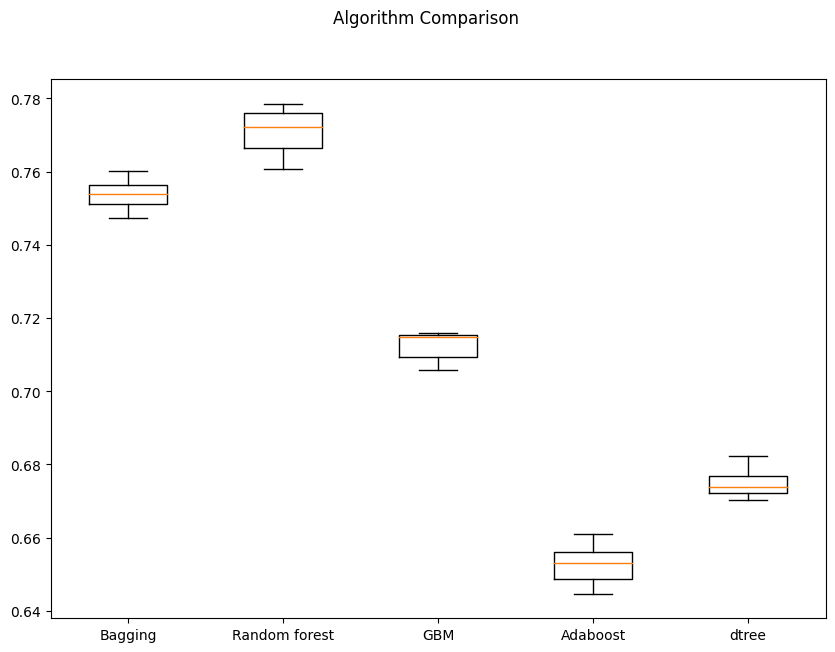

In [66]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results1)
ax.set_xticklabels(names)

plt.show()

### Tune models using grid/random search or using statistical analysis
Finding a set of optimal hyperparameter values for a learning algorithm while applying this optimized algorithm to any data set. In order to optimize our Adaboost, dtree, and GBM models, we will employ two methods of hyperparameter tuning: GridSearchCV and RandomizedSearchCV. We will then compare the performance and computational time of these two methods to determine which is more efficient for our models.

Adaboost

GridSearchCV



In [67]:
%%time

from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import numpy as np

# Defining the model
model = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in GridSearchCV
param_grid = {
    "n_estimators": np.arange(10, 110, 10),
    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score, average='macro')

# Calling GridSearchCV
grid_cv = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scorer, cv=5, n_jobs=-1)

# Fitting parameters in GridSearchCV
grid_cv.fit(X_train, y_train)

print(
    "Best Parameters: {} \nScore: {}".format(grid_cv.best_params_, grid_cv.best_score_)
)

Best Parameters: {'estimator': DecisionTreeClassifier(max_depth=3, random_state=1), 'learning_rate': 0.1, 'n_estimators': 10} 
Score: 0.7156371986466155
CPU times: user 8.59 s, sys: 2.47 s, total: 11.1 s
Wall time: 2min 15s


In [68]:
# building model with best parameters
adb_tuned1 = AdaBoostClassifier(
    n_estimators=30,
    learning_rate=1,
    random_state=1,
    base_estimator=DecisionTreeClassifier(max_depth=2, random_state=1),
)

# Fit the model on training data
adb_tuned1.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.



AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2,
                                                         random_state=1),
                   learning_rate=1, n_estimators=30, random_state=1)

In [69]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

def model_performance_classification_sklearn(model, X, y):
    """
    Function to calculate different performance metrics.
    Arguments:
    model : classifier
    X : {array-like, sparse matrix} of shape (n_samples, n_features)
    y : array-like of shape (n_samples,)
    Returns:
    Dictionary containing the metrics.
    """
    y_pred = model.predict(X)

    performance = {
        "Accuracy": accuracy_score(y, y_pred),
        "Recall": recall_score(y, y_pred, average='macro'),  # Using average='macro'
        "Precision": precision_score(y, y_pred, average='macro'),  # Using average='macro'
        "F1 Score": f1_score(y, y_pred, average='macro'),  # Using average='macro'
    }

    return performance

# Example usage:
# Calculating different metrics on train set
Adaboost_grid_train = model_performance_classification_sklearn(adb_tuned1, X_train, y_train)
print("Training performance:")
print(Adaboost_grid_train)

Training performance:
{'Accuracy': 0.7119824940892399, 'Recall': 0.7031628573599612, 'Precision': 0.6819534287420391, 'F1 Score': 0.6898455813791354}


In [70]:
# Calculating different metrics on validation set
Adaboost_grid_val = model_performance_classification_sklearn(adb_tuned1, X_val, y_val)
print("validation performance:")
Adaboost_grid_val

validation performance:


{'Accuracy': 0.7129706481551347,
 'Recall': 0.7039038386290367,
 'Precision': 0.6819440379810925,
 'F1 Score': 0.6898895113854779}

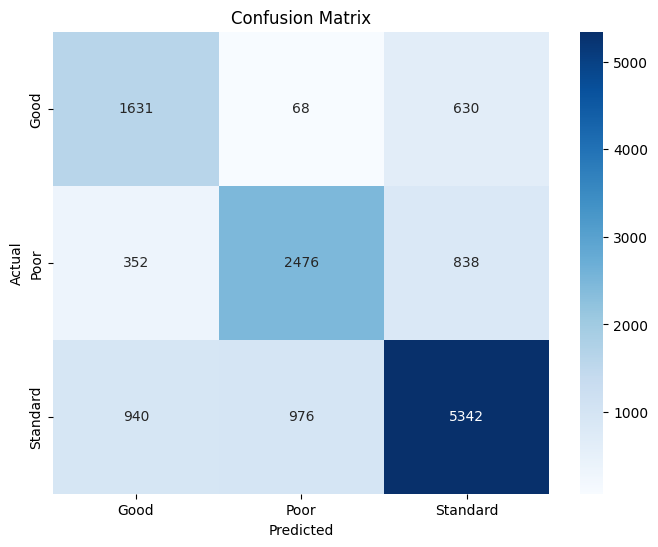

In [71]:
from sklearn.metrics import confusion_matrix

def confusion_matrix_sklearn(model, predictors, target):
    """
    Function to create a confusion matrix.
    Arguments:
    model : classifier
    predictors : {array-like, sparse matrix} of shape (n_samples, n_features)
    target : array-like of shape (n_samples,)
    """
    # Predict the target values
    predictions = model.predict(predictors)

    # Calculate the confusion matrix
    cm = confusion_matrix(target, predictions)

    # Plot the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(target), yticklabels=np.unique(target))
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

confusion_matrix_sklearn(adb_tuned1, X_val, y_val)

RandomizedSearchCV



In [72]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics
import numpy as np

# Defining the base estimator options
estimator_options = [
    DecisionTreeClassifier(random_state=1, max_depth=1),
    DecisionTreeClassifier(random_state=1, max_depth=2),
    DecisionTreeClassifier(random_state=1, max_depth=3)
]

# Defining the AdaBoost classifier
model = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in RandomizedSearchCV
param_grid = {
    "n_estimators": np.arange(10, 60, 10),  # Reduced range
    "learning_rate": [0.1, 0.2, 0.05, 1],  # Removed 0.01 to reduce the grid size
    "estimator": estimator_options,
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.accuracy_score)

# Calling RandomizedSearchCV with reduced iterations and fewer cross-validation folds
randomized_cv = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=20, scoring=scorer, cv=3, random_state=1, n_jobs=-1, verbose=2)

# Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train, y_train)

print("Best parameters are {} with CV score={}:".format(randomized_cv.best_params_, randomized_cv.best_score_))

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best parameters are {'n_estimators': 40, 'learning_rate': 0.05, 'estimator': DecisionTreeClassifier(max_depth=3, random_state=1)} with CV score=0.7164594674917586:


In [73]:
# building model with best parameters
adb_tuned2 = AdaBoostClassifier(
    n_estimators=20,
    learning_rate=1,
    random_state=1,
    base_estimator=DecisionTreeClassifier(max_depth=3, random_state=1),
)

# Fit the model on training data
adb_tuned2.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.



AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                         random_state=1),
                   learning_rate=1, n_estimators=20, random_state=1)

In [74]:
# Calculating different metrics on train set
Adaboost_random_train = model_performance_classification_sklearn(
    adb_tuned2, X_train, y_train
)
print("training performance:")
Adaboost_random_train

training performance:


{'Accuracy': 0.7196790583027315,
 'Recall': 0.6998783987036049,
 'Precision': 0.6881516868516092,
 'F1 Score': 0.6935393356314415}

In [75]:
# Calculating different metrics on validation set
Adaboost_random_val = model_performance_classification_sklearn(adb_tuned2, X_val, y_val)
print("validation performance:")
Adaboost_random_val

validation performance:


{'Accuracy': 0.7182524711386101,
 'Recall': 0.6954444079037722,
 'Precision': 0.6849712505754756,
 'F1 Score': 0.6898236530194078}

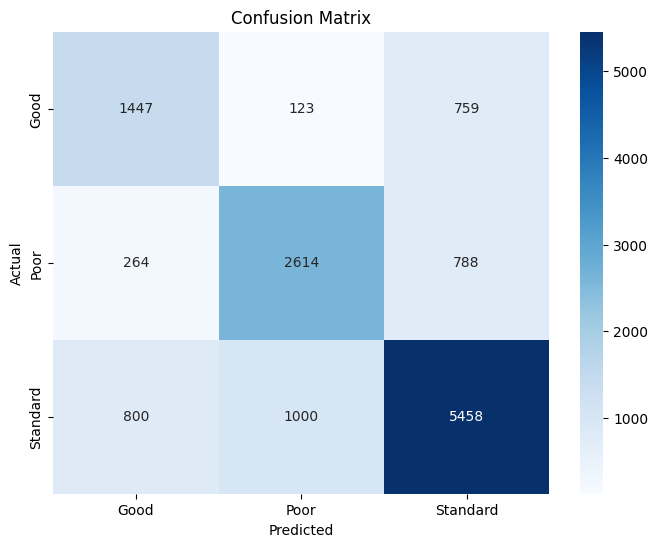

In [76]:
# creating confusion matrix
confusion_matrix_sklearn(adb_tuned2, X_val, y_val)

### Gradient Boosting (GBM)
GridSearchCV

In [77]:
%%time

# defining model
Model = GradientBoostingClassifier(random_state=1)

#Parameter grid to pass in GridSearchCV
param_grid={
            "n_estimators": np.arange(25,100,25),
            "learning_rate": [0.2,0.01, 0.05, 1],
            "subsample":[0.2,0.3,0.4,0.5],
            "max_features":[0.5,0.6,0.7,0.8]}

#Calling GridSearchCV
grid_cv = GridSearchCV(estimator=Model, param_grid=param_grid, scoring=scorer, n_jobs = -1, cv=5)

#Fitting parameters in GridSearchCV
grid_cv.fit(X_train, y_train)

print("Best parameters are {} with CV score={}:" .format(grid_cv.best_params_,grid_cv.best_score_))

Best parameters are {'learning_rate': 0.2, 'max_features': 0.7, 'n_estimators': 75, 'subsample': 0.5} with CV score=0.7322300739413212:
CPU times: user 22.8 s, sys: 952 ms, total: 23.7 s
Wall time: 2min 16s


In [78]:
# Creating new pipeline with best parameters
tuned_gbm1 = GradientBoostingClassifier(
    max_features=0.7,
    random_state=1,
    learning_rate=1,
    n_estimators=50,
    subsample=0.2
)

tuned_gbm1.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=1, max_features=0.7, n_estimators=50,
                           random_state=1, subsample=0.2)

In [79]:
gbm_grid_train = model_performance_classification_sklearn(
    tuned_gbm1, X_train, y_train
)
print("training performance:")
gbm_grid_train

training performance:


{'Accuracy': 0.7218672971477439,
 'Recall': 0.6810756588939374,
 'Precision': 0.6987042242629796,
 'F1 Score': 0.6886257587588794}

In [80]:
gbm_grid_val = model_performance_classification_sklearn(tuned_gbm1, X_val, y_val)
print("validation performance:")
gbm_grid_val

validation performance:


{'Accuracy': 0.7024824568022334,
 'Recall': 0.6569979624586894,
 'Precision': 0.6759324399103485,
 'F1 Score': 0.6653235036695971}

RandomSearchCV

In [81]:
%%time

# defining model
Model = GradientBoostingClassifier(random_state=1)

#Parameter grid to pass in RandomSearchCV
param_grid={
            "n_estimators": np.arange(50,150,25),
            "learning_rate": [0.2,0.01, 0.05, 1],
            "subsample":[0.3,0.4,0.5,0.7,0.6],
            "max_features":[0.3,0.4,0.5,0.6,0.7]
}

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, scoring=scorer, n_iter=50, n_jobs = -1, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train, y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.7, 'n_estimators': 125, 'max_features': 0.6, 'learning_rate': 0.2} with CV score=0.7377131674463837:
CPU times: user 30.5 s, sys: 333 ms, total: 30.8 s
Wall time: 1min 35s


In [82]:
# Creating new pipeline with best parameters
tuned_gbm = GradientBoostingClassifier(
    max_features=0.7,
    random_state=1,
    learning_rate=1,
    n_estimators=75,
    subsample=0.3
)

tuned_gbm.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=1, max_features=0.7, n_estimators=75,
                           random_state=1, subsample=0.3)

In [83]:
gbm_random_train= model_performance_classification_sklearn(
    tuned_gbm, X_train, y_train
)
print("training performance:")
gbm_random_train

training performance:


{'Accuracy': 0.7458624679309824,
 'Recall': 0.717734724889882,
 'Precision': 0.7215566436005857,
 'F1 Score': 0.7192629543357357}

In [84]:
gbm_random_val = model_performance_classification_sklearn(tuned_gbm, X_val, y_val)
print("validation performance:")
gbm_random_val

validation performance:


{'Accuracy': 0.7106315551195955,
 'Recall': 0.6748600319290428,
 'Precision': 0.6820052682346484,
 'F1 Score': 0.6779544922514814}

### Decision Tree (dtree)
GridsearchCV

In [85]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import numpy as np
import pandas as pd

# Ensuring there are no missing values in the dataset
X_train = pd.DataFrame(X_train).fillna(0)
y_train = pd.Series(y_train).fillna(0)

# Choose the type of classifier.
dtree_estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(10, 30, 5),
    "min_samples_leaf": [3, 5, 7],
    "max_leaf_nodes": [2, 3, 5],
    "min_impurity_decrease": [0.0001, 0.001],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.accuracy_score)

# Calling GridSearchCV
grid_cv = GridSearchCV(estimator=dtree_estimator, param_grid=parameters, scoring=scorer, cv=5, n_jobs=-1)

# Fitting parameters in GridSearchCV
grid_cv.fit(X_train, y_train)

print("Best parameters are {} with CV score={}:" .format(grid_cv.best_params_, grid_cv.best_score_))

Best parameters are {'max_depth': 10, 'max_leaf_nodes': 5, 'min_impurity_decrease': 0.0001, 'min_samples_leaf': 3} with CV score=0.6881885515077638:


In [86]:
# building model with best parameters
dt_tuned_grid = DecisionTreeClassifier(
     max_depth= 10,
    min_samples_leaf= 3,
    max_leaf_nodes= 5,
    min_impurity_decrease= 0.0001,
)

# Fit the model on training data
dt_tuned_grid.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, max_leaf_nodes=5,
                       min_impurity_decrease=0.0001, min_samples_leaf=3)

In [87]:
dt_grid_train = model_performance_classification_sklearn(
    dt_tuned_grid, X_train, y_train
)
print("training performance:")
dt_grid_train

training performance:


{'Accuracy': 0.6886915840837065,
 'Recall': 0.7195609546022125,
 'Precision': 0.6663891343187963,
 'F1 Score': 0.6754364940542933}

In [88]:
dt_grid_val = model_performance_classification_sklearn(
    dt_tuned_grid, X_val, y_val
)
print("validation performance:")
dt_grid_val

validation performance:


{'Accuracy': 0.6895797177997435,
 'Recall': 0.7184570251514925,
 'Precision': 0.6665519901270364,
 'F1 Score': 0.6753567907949917}

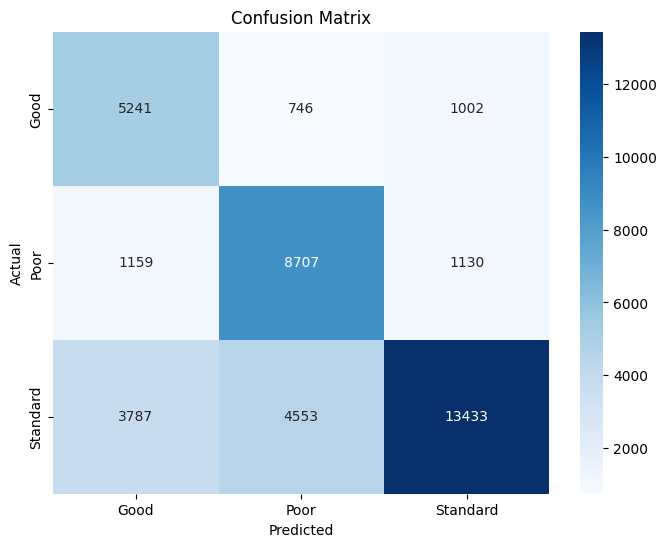

In [89]:
confusion_matrix_sklearn(dt_tuned_grid, X_train, y_train)

RandomSearchCV

In [90]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics
import numpy as np
import pandas as pd

# Ensure no missing values in the dataset
X_train = pd.DataFrame(X_train).fillna(0)
y_train = pd.Series(y_train).fillna(0)

# Defining the model
model = DecisionTreeClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "max_depth": np.arange(2, 6),
    "min_samples_leaf": [1, 2, 3, 4, 7],
    "max_leaf_nodes": [10, 15, 20],
    "min_impurity_decrease": [0.0001, 0.001],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.accuracy_score)  # Change scoring metric for debugging

# Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_jobs=-1, n_iter=50, scoring=scorer, cv=5, random_state=1, verbose=2)

# Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train, y_train)

print("Best parameters are {} with CV score={}:".format(randomized_cv.best_params_, randomized_cv.best_score_))

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters are {'min_samples_leaf': 4, 'min_impurity_decrease': 0.0001, 'max_leaf_nodes': 20, 'max_depth': 5} with CV score=0.7201317071084538:


In [91]:
# building model with best parameters
dt_tuned = DecisionTreeClassifier(
     max_depth= 5,
    min_samples_leaf= 2,
    max_leaf_nodes= 15,
    min_impurity_decrease= 0.001,
)

# Fit the model on training data
dt_tuned.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, max_leaf_nodes=15,
                       min_impurity_decrease=0.001, min_samples_leaf=2)

In [92]:
## To check the performance on training set
dt_random_train = model_performance_classification_sklearn(
    dt_tuned, X_train, y_train
)
print("training performance:")
dt_random_train

training performance:


{'Accuracy': 0.719402384425776,
 'Recall': 0.7070424276492852,
 'Precision': 0.6908866852673929,
 'F1 Score': 0.6946664081761235}

In [93]:
## To check the performance on validation set
dt_random_val = model_performance_classification_sklearn(
    dt_tuned, X_val, y_val
)
print("validation performance:")
dt_random_train

validation performance:


{'Accuracy': 0.719402384425776,
 'Recall': 0.7070424276492852,
 'Precision': 0.6908866852673929,
 'F1 Score': 0.6946664081761235}

### Model Performance Comparison and Final Model Selection

In [95]:
# Function to convert dictionary to DataFrame and handle scalar values
def dict_to_dataframe(d):
    if isinstance(d, dict):
        return pd.DataFrame([d])
    else:
        raise ValueError("Provided input is not a dictionary")

# Convert dictionaries to DataFrames
Adaboost_grid_train_df = dict_to_dataframe(Adaboost_grid_train).T
Adaboost_random_train_df = dict_to_dataframe(Adaboost_random_train).T
gbm_grid_train_df = dict_to_dataframe(gbm_grid_train).T
gbm_random_train_df = dict_to_dataframe(gbm_random_train).T
dt_grid_train_df = dict_to_dataframe(dt_grid_train).T
dt_random_train_df = dict_to_dataframe(dt_random_train).T

# Concatenate DataFrames
models_train_comp_df = pd.concat(
    [
        Adaboost_grid_train_df,
        Adaboost_random_train_df,
        gbm_grid_train_df,
        gbm_random_train_df,
        dt_grid_train_df,
        dt_random_train_df
    ],
    axis=1,
)

# Rename columns
models_train_comp_df.columns = [
    "AdaBoost_GridSearchCV",
    "AdaBoost_RandomizedSearchCV",
    "GBM_GridSearchCV",
    "GBM_RandomizedSearchCV",
    "Decision Tree_GridSearchCV",
    "Decision Tree_RandomizedSearchCV",
]

# Display the comparison
print("Training performance comparison:")
print(models_train_comp_df)


Training performance comparison:
           AdaBoost_GridSearchCV  AdaBoost_RandomizedSearchCV  \
Accuracy                0.711982                     0.719679   
Recall                  0.703163                     0.699878   
Precision               0.681953                     0.688152   
F1 Score                0.689846                     0.693539   

           GBM_GridSearchCV  GBM_RandomizedSearchCV  \
Accuracy           0.721867                0.745862   
Recall             0.681076                0.717735   
Precision          0.698704                0.721557   
F1 Score           0.688626                0.719263   

           Decision Tree_GridSearchCV  Decision Tree_RandomizedSearchCV  
Accuracy                     0.688692                          0.719402  
Recall                       0.719561                          0.707042  
Precision                    0.666389                          0.690887  
F1 Score                     0.675436                          0.6946

In [98]:
# Function to convert dictionary to DataFrame and handle scalar values
def dict_to_dataframe(d):
    if isinstance(d, dict):
        # Check if values are scalar
        if all(isinstance(v, (int, float, str, bool)) for v in d.values()):
            return pd.DataFrame([d])
        else:
            return pd.DataFrame(d)
    else:
        raise ValueError("Provided input is not a dictionary")

# Convert dictionaries to DataFrames
Adaboost_grid_val_df = dict_to_dataframe(Adaboost_grid_val)
Adaboost_random_val_df = dict_to_dataframe(Adaboost_random_val)
gbm_grid_val_df = dict_to_dataframe(gbm_grid_val)
gbm_random_val_df = dict_to_dataframe(gbm_random_val)
dt_grid_val_df = dict_to_dataframe(dt_grid_val)
dt_random_val_df = dict_to_dataframe(dt_random_val)

# Transpose DataFrames if necessary
Adaboost_grid_val_df = Adaboost_grid_val_df.T if Adaboost_grid_val_df.shape[0] == 1 else Adaboost_grid_val_df
Adaboost_random_val_df = Adaboost_random_val_df.T if Adaboost_random_val_df.shape[0] == 1 else Adaboost_random_val_df
gbm_grid_val_df = gbm_grid_val_df.T if gbm_grid_val_df.shape[0] == 1 else gbm_grid_val_df
gbm_random_val_df = gbm_random_val_df.T if gbm_random_val_df.shape[0] == 1 else gbm_random_val_df
dt_grid_val_df = dt_grid_val_df.T if dt_grid_val_df.shape[0] == 1 else dt_grid_val_df
dt_random_val_df = dt_random_val_df.T if dt_random_val_df.shape[0] == 1 else dt_random_val_df

# Concatenate DataFrames
models_val_comp_df = pd.concat(
    [
        Adaboost_grid_val_df,
        Adaboost_random_val_df,
        gbm_grid_val_df,
        gbm_random_val_df,
        dt_grid_val_df,
        dt_random_val_df
    ],
    axis=1,
)

# Rename columns
models_val_comp_df.columns = [
    "AdaBoost_GridSearchCV",
    "AdaBoost_RandomizedSearchCV",
    "GBM_GridSearchCV",
    "GBM_RandomizedSearchCV",
    "Decision Tree_GridSearchCV",
    "Decision Tree_RandomizedSearchCV",
]

# Display the comparison
print("Validation performance comparison:")
print(models_val_comp_df)

Validation performance comparison:
           AdaBoost_GridSearchCV  AdaBoost_RandomizedSearchCV  \
Accuracy                0.712971                     0.718252   
Recall                  0.703904                     0.695444   
Precision               0.681944                     0.684971   
F1 Score                0.689890                     0.689824   

           GBM_GridSearchCV  GBM_RandomizedSearchCV  \
Accuracy           0.702482                0.710632   
Recall             0.656998                0.674860   
Precision          0.675932                0.682005   
F1 Score           0.665324                0.677954   

           Decision Tree_GridSearchCV  Decision Tree_RandomizedSearchCV  
Accuracy                     0.689580                          0.720667  
Recall                       0.718457                          0.708057  
Precision                    0.666552                          0.691363  
F1 Score                     0.675357                          0.69

In [99]:
# Calculating different metrics on the test set
adaboost_grid_test = model_performance_classification_sklearn(adb_tuned1, X_test, y_test)
print("test performance:")
adaboost_grid_test

test performance:


{'Accuracy': 0.7108579189617446,
 'Recall': 0.7000202756850041,
 'Precision': 0.68009788305484,
 'F1 Score': 0.6873570943332968}

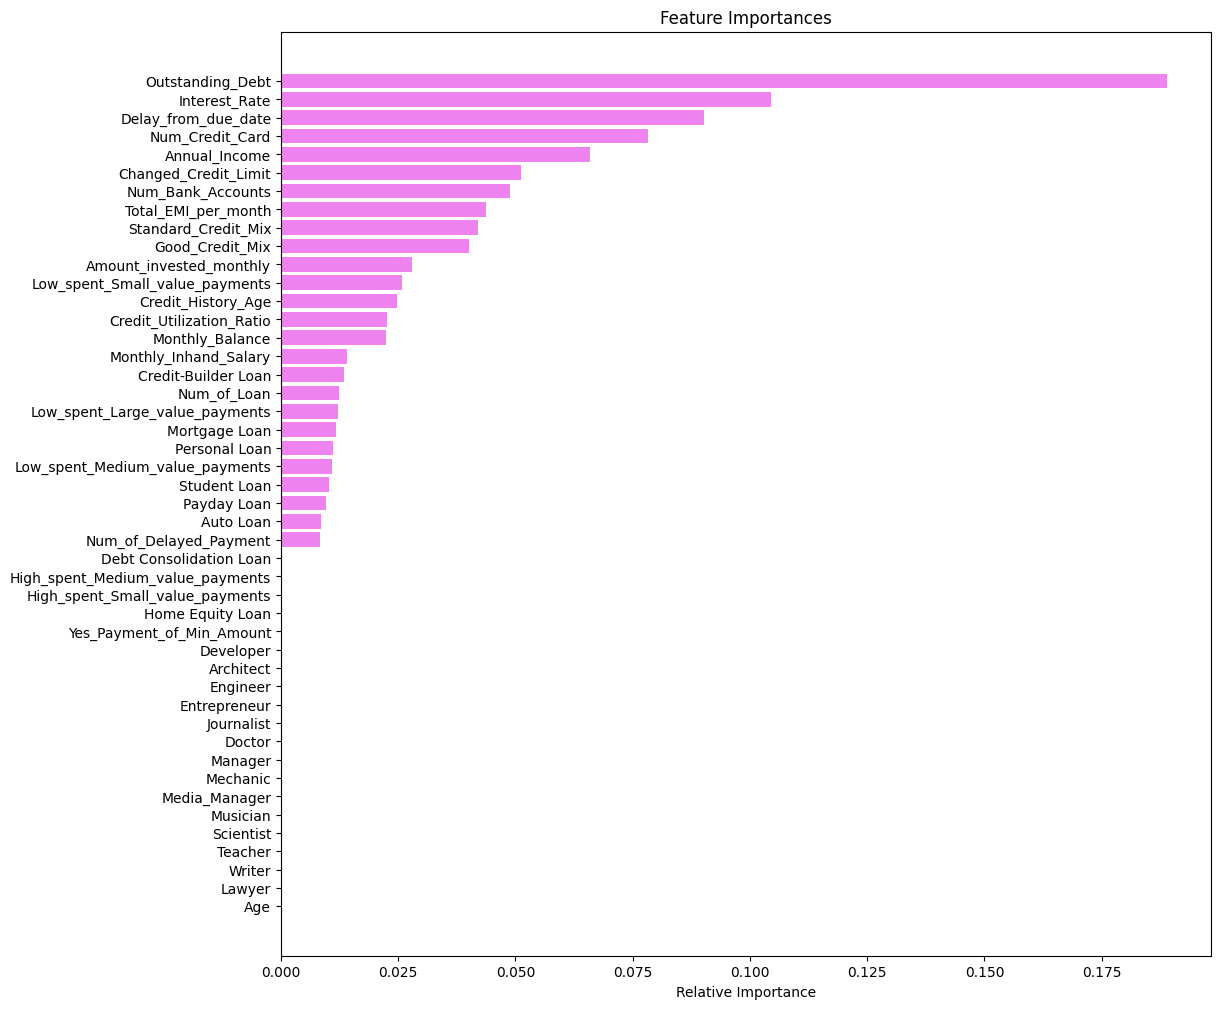

In [100]:
#checking the feature performance
feature_names = X.columns
importances = adb_tuned1.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()